# Social Networks and Text Analysis - Lab 1: Introduction to Networks

_Lecturer:_ Dr. Riccardo Di Clemente r.di-clemente@exeter.ac.uk
\
_Teaching assistant:_  Ben Dennes b.g.dennes@exeter.ac.uk

In [ ]:
!pip install --upgrade scipy networkx

In [2]:
#Importing the necessary libraries for this lab:
#------------------------------------------------
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams #---> Library for set the attributes of the figures

#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Lets play with networks! 

## 1 Create the empty network

In [3]:
G = nx.Graph() #---> Create an empty undirected network (use nx.DiGraph() for the directed version)
G.add_node(1) #---> Add one node
G.nodes()

NodeView((1,))

In [4]:
G.add_node('abc')

In [5]:
G.nodes()

NodeView((1, 'abc'))

In [6]:
G.add_nodes_from(range(10)) #---> Add nodes from a list or array, here we add nodes from 0 to 9
G.nodes()

NodeView((1, 'abc', 0, 2, 3, 4, 5, 6, 7, 8, 9))

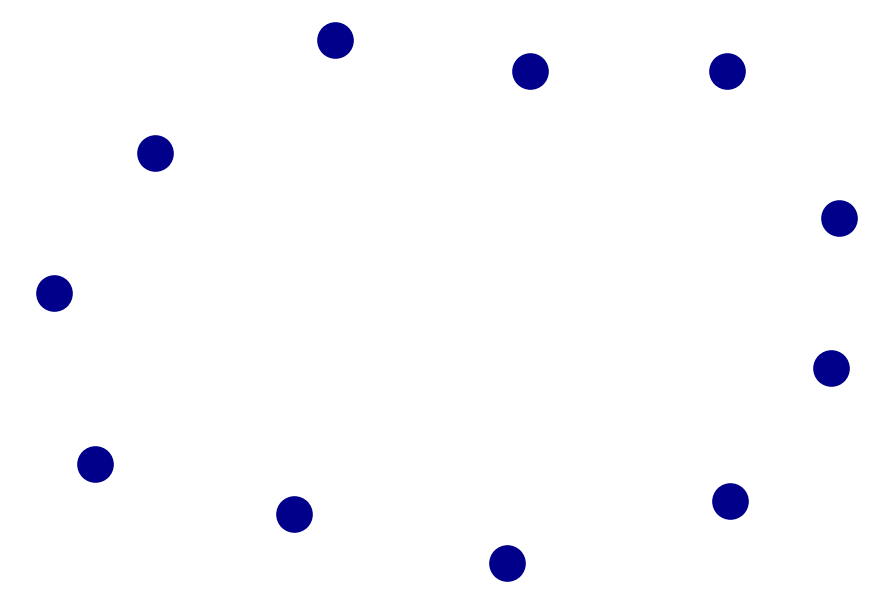

In [12]:
nx.draw(G, node_color='darkblue') #---> Plot the network which just contains nodes. This function can change 
                                    #color, layout, size, labels and other attributes of the nodes and edges.

## 2 Add the edges

Each edge is composed by source and target, and can be added to the network one by one or in a list/array. Wighted edges can be added here too.

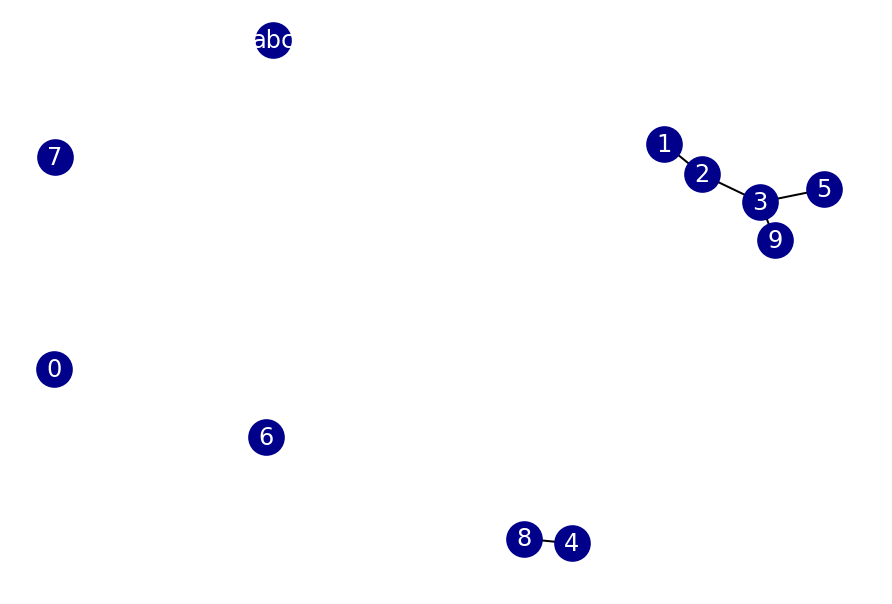

In [13]:
G.add_edge(1,2) #---> Add one edge as a tuple ()
e=[(2,3),(9,3),(8,4),(3,5)] #---> Create a list [] of tuples () being the edges
G.add_edges_from(e) #---> Add the list of edges 
nx.draw(G, with_labels=True, node_color='darkblue', font_color='white') #---> Plot the network

In [ ]:
list(nx.connected_components(G))

## 3 Check the adjacency matrix

In [14]:
nx.adjacency_matrix(G)

<11x11 sparse array of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [15]:
nx.adjacency_matrix(G).A # '.A' function gets a full 'dense' array from the numpy sparse format

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [16]:
G.nodes

NodeView((1, 'abc', 0, 2, 3, 4, 5, 6, 7, 8, 9))

In [17]:
print(nx.adjacency_matrix(G)) #---> Check the numpy array with the adjacency network with values different to 0
#This network is unweighted then all the next values are 1

  (0, 3)	1
  (3, 0)	1
  (3, 4)	1
  (4, 3)	1
  (4, 6)	1
  (4, 10)	1
  (5, 9)	1
  (6, 4)	1
  (9, 5)	1
  (10, 4)	1


In [ ]:
#To visualize the edges and their attributes (eg weight) use the next function. 
#This object can be converted to a dict, or indexed as one, in wich the first keys are the sources, 
#the second keys are the targets and edge attributes can be other objects:
G.adj

AdjacencyView({1: {2: {}}, 0: {}, 2: {1: {}, 3: {}}, 3: {2: {}, 9: {}, 5: {}}, 4: {8: {}}, 5: {3: {}}, 6: {}, 7: {}, 8: {4: {}}, 9: {3: {}}})

In [ ]:
# e.g.
G.adj[1]

AtlasView({2: {}})

In [18]:
print(nx.adjacency_matrix(G)) #--> visualize the entire adjacency matrix

  (0, 3)	1
  (3, 0)	1
  (3, 4)	1
  (4, 3)	1
  (4, 6)	1
  (4, 10)	1
  (5, 9)	1
  (6, 4)	1
  (9, 5)	1
  (10, 4)	1


In [19]:
adj = nx.adjacency_matrix(G).A

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


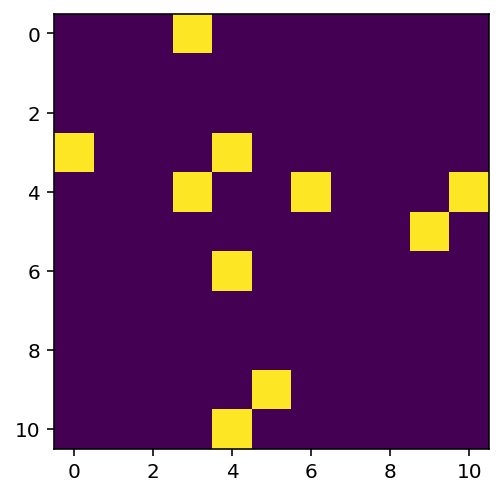

In [21]:
plt.imshow(adj) #--> This function creates a heatmap from a 2-dimensional numpy array

  (0, 3)	1
  (3, 0)	1
  (3, 4)	1
  (4, 3)	1
  (4, 6)	1
  (4, 10)	1
  (5, 9)	1
  (6, 4)	1
  (9, 5)	1
  (10, 4)	1


/usr/local/lib/python3.8/dist-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


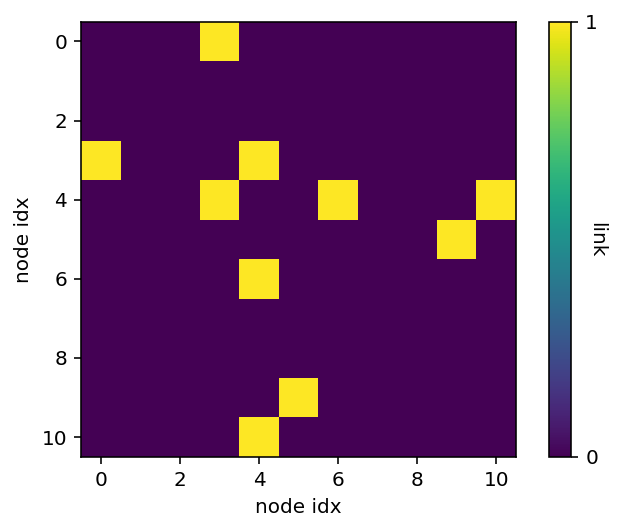

In [22]:
print(nx.adjacency_matrix(G)) #--> visualize the entire adjacency matrix

plt.imshow(nx.adjacency_matrix(G).A) #--> This function creates a heatmap from a 2-dimensional numpy array
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis
plt.show() #---> display the plot

## 4 Work with weighted networks

In [23]:
#Iterate over the edges list and add an random uniform weight from 0 to 1:
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.uniform(0, 1) #<-- Add the edge attribute of weight to each node

In [24]:
nx.adjacency_matrix(G).A

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


array([[0.        , 0.        , 0.        , 0.66788149, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.66788149, 0.        , 0.        , 0.        , 0.33900383,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.33900383, 0.        ,
        0.        , 0.32400649, 0.        , 0.        , 0.        ,
        0.73507776],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77958454,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

  (0, 3)	0.6679
  (3, 0)	0.6679
  (3, 4)	0.339
  (4, 3)	0.339
  (4, 6)	0.324
  (4, 10)	0.7351000000000001
  (5, 9)	0.7796000000000001
  (6, 4)	0.324
  (9, 5)	0.7796000000000001
  (10, 4)	0.7351000000000001


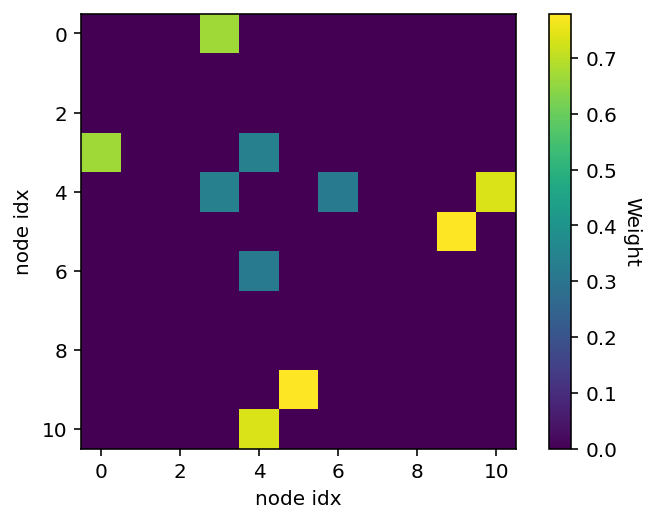

In [26]:
#Check again the adjacency matrix of the network and notice the differences:
print(np.around(nx.adjacency_matrix(G), 4)) #--> visualize the entire adjacency matrix (with weights rounded to 4dp for display purposes)

plt.imshow(nx.adjacency_matrix(G).A) #--> This function creates a heatmap from a 2-dimensional numpy array
cbar = plt.colorbar() #--> set the colorbar of the heatmap

cbar.set_label('Weight', rotation=270, labelpad=12) #--> label the colour bar, rotate the label, and offset it to avoid overlap
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis
plt.show()

## 5 Network statistics

### 5.1 Degree distribution

In [33]:
G = nx.karate_club_graph() #<-- G is an existing famous network - "Zachary's karate club"

In [30]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [31]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [34]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  #<-- get the degree of each node and order the list from highest to lowest
print("Degree sequence", degree_sequence)

degree_count = collections.Counter(degree_sequence) #<-- count the frequency of each degree (i.e. the number of times each degree value appears in the network)
print("Degree frequencies", degree_count)

deg, cnt = zip(*degree_count.items())

Degree sequence [17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
Degree frequencies Counter({2: 11, 4: 6, 3: 6, 5: 3, 6: 2, 17: 1, 16: 1, 12: 1, 10: 1, 9: 1, 1: 1})


In [35]:
deg, cnt = zip(*degree_count.items()) #<-- Function that create lists of iterables, 
                                     # one for the degrees and the other one for the frquencies
                                     # i.e. converts list of tuples [(a,1), (b,2), ...] to iterable of tuples [(a,b,...), (1,2,...)]

In [ ]:
plt.figure()

In [49]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

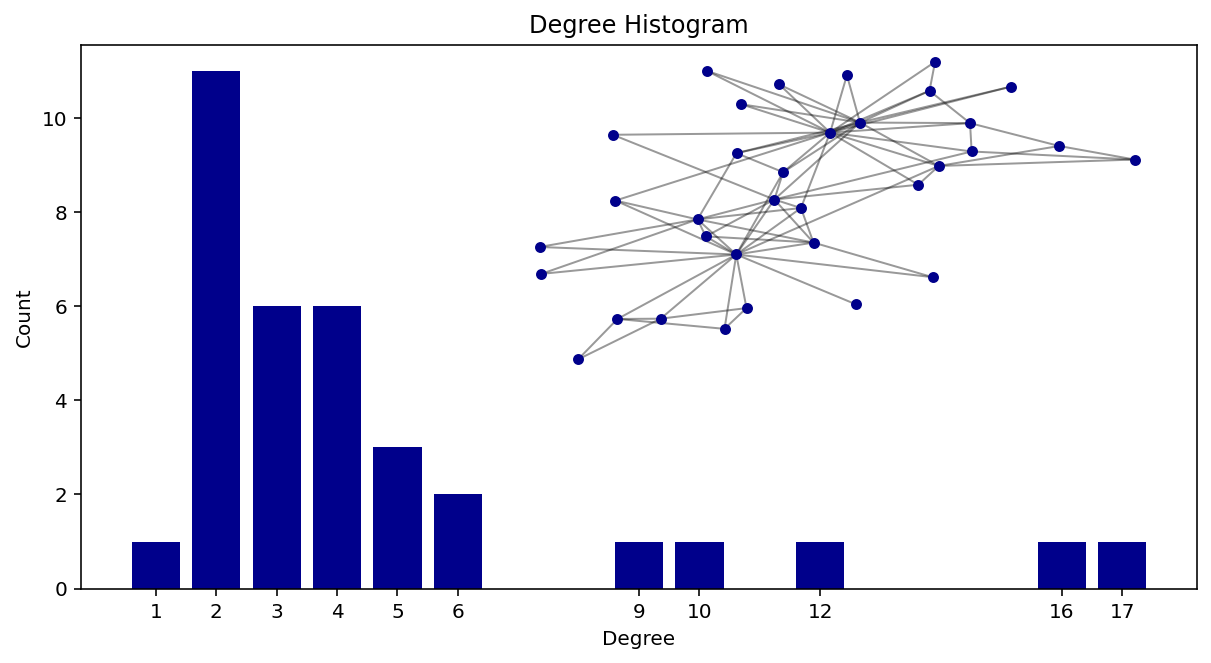

In [52]:
fig, ax = plt.subplots(figsize=(10,5)) #<-- Create the plot (figure and axis)
ax.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

# Add title, x and y labels, and ticks with frequencies larger than zero
# When working with an axis object (ax) rather than plt, must use set_... functions
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree")
ax.set_xticks(deg)
ax.set_xticklabels(deg)
# ax.set_xticks(range(1, max(deg)+1))

#Draw the network inside the barplot
plt.axes([0.4, 0.4, 0.5, 0.5]) #<--- adds a new axes within the figure and makes it the current axes

# #Select the largest connected component of the network 
# #(for this particular example network this function selects the entire network as there is only one connected component)
Gcc = G.subgraph( sorted( nx.connected_components(G) , key=len, reverse=True)[0] )

pos = nx.spring_layout(G) #<-- Set the layout of the network (define positions for each node) - layouts will explained in more detail in next week's lab
plt.axis('off') #<-- don't draw the axis outline box for the network plot

# # plot the nodes and edges separately - allows for plot parameters to be set separately (e.g alpha)
nx.draw_networkx_nodes(G, pos, node_color='darkblue', node_size=20) #<-- Plot the nodes
nx.draw_networkx_edges(G, pos, alpha=0.4) #<-- Plot the edges

plt.show()

In [53]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [54]:
nx.density(G)

0.13903743315508021

In [ ]:
print('Average degree', np.mean(G.degree()))
print('Connectance', nx.density(G)) #<--- proportion of all possible connections in a network that exist (0 for no edges, 1 for a complete graph)

Average degree 10.544117647058824
Connectance 0.13903743315508021


### 5.2 Shortest Path

[14, 32, 2, 0, 5, 16]
[(14, 32), (32, 2), (2, 0), (0, 5), (5, 16)]


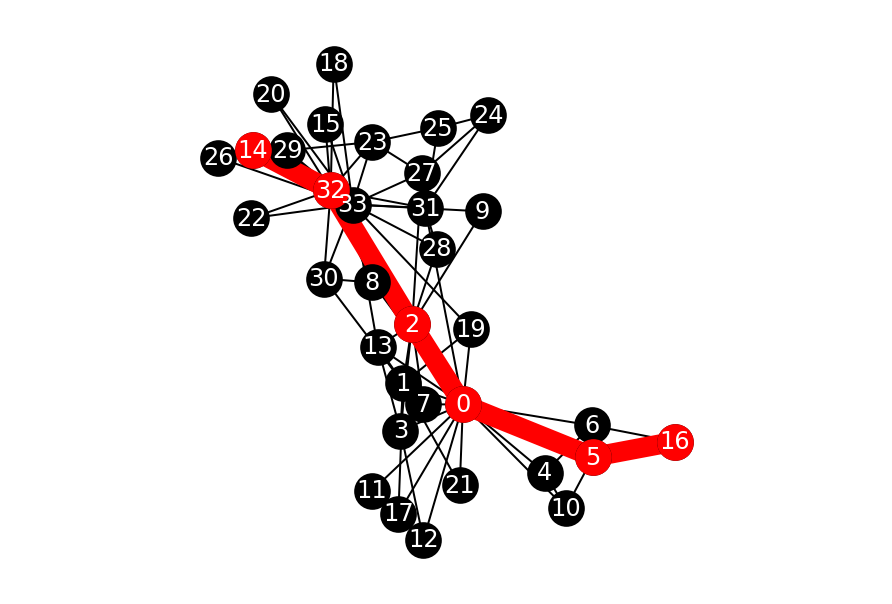

In [58]:
R = nx.karate_club_graph() #<-- R is a new copy of the Zachary's Karate Club network

# We will detected the shortest path from one node to another
source = 14  #<-- Source node
target = 16  #<-- Target node

def short_path_plot(G, source, target):
    '''This function calculates the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the source node'''
    
    pos = nx.spring_layout(G) #<-- Set the layout of the network (locations of the nodes)
    nx.draw(G, pos, node_color='k', with_labels=True, font_color='white') #<-- Plot the original network in black

    path = nx.shortest_path(G, source, target) #<-- this function returns the nodes in the shortest path
    print(path)
    path_edges = list(zip(path, path[1:])) #<-- create a list of the *edges* in the shortest path
    print(path_edges)

    # plot the shortest path nodes and edges in red on top of the previous black plot
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r', label=True)  #<-- plot the shortest path nodes
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r',width=10)  #<-- plot the shortest path edges

    plt.axis('equal') #<--- make the plot axis square
    plt.show()

#Run the created funtion
short_path_plot(R, source, target)

### 5.3 Directed networks

In [68]:
nx.Graph().to_directed()

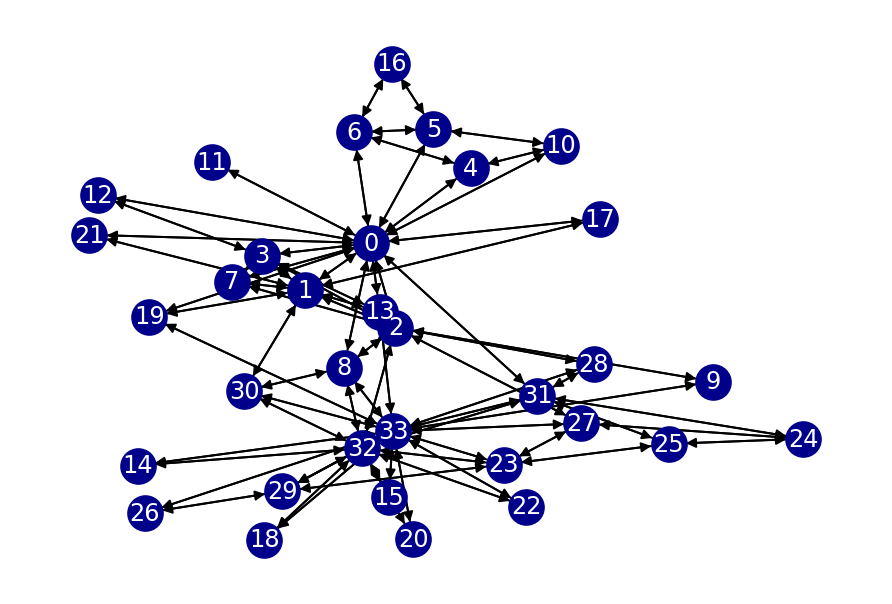

In [60]:
DiR = nx.Graph.to_directed(R) #<-- convert the previous network R to a directed graph
                              #each edge is converted to two directed edges (e.g. a--b converted to a->b and a<-b)
pos = nx.spring_layout(DiR)
nx.draw(DiR, pos=pos, with_labels=True, node_color='darkblue', font_color='white', node_size=300) #<-- Plot the network                                                                                 

Remove some edges at random and plot the network (with the same layout so differences are visible)

In [61]:
n_edges_to_remove = random.randint(0, len(DiR.edges)) #<-- define a random number of edeges to remove
                                                      # between 0 and all the edges
n_edges_to_remove                                                

85

In [ ]:
edges_to_remove = random.sample(set(range(len(DiR.edges))), n_edges_to_remove) #<-- Select a random sample of edges
                                                                           #with the number of edges to remove
edges_to_remove

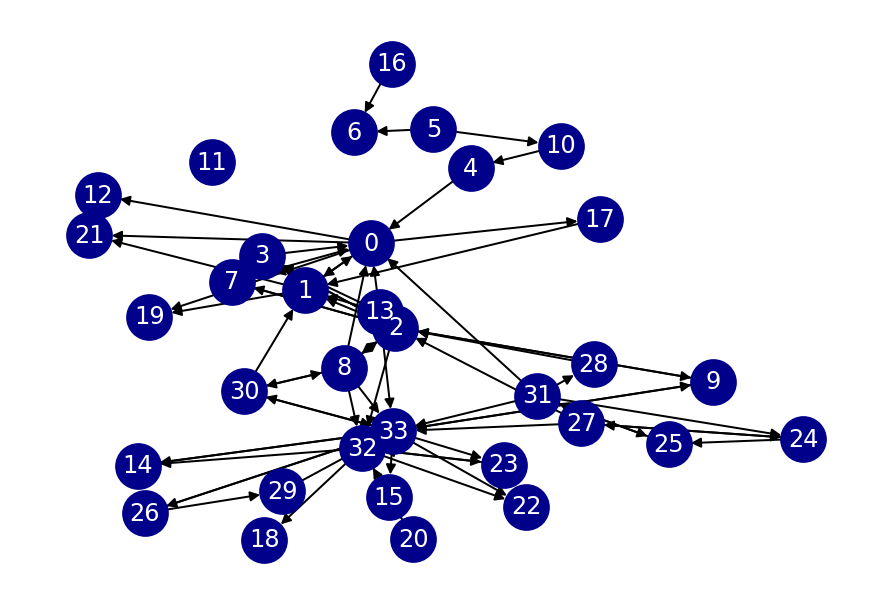

In [64]:
DiR.remove_edges_from(np.array(DiR.edges)[edges_to_remove]) #<-- Remove the selected edges

#Plot the network with the same layout of the original network:
nx.draw(DiR, pos = pos, node_size=500, with_labels=True, node_color='darkblue', font_color='white')

### 5.4 Indegree and Outdegree

Degree distribution calculations use the same code as 5.1, but calculate specifically the outdegree & indegree distributions

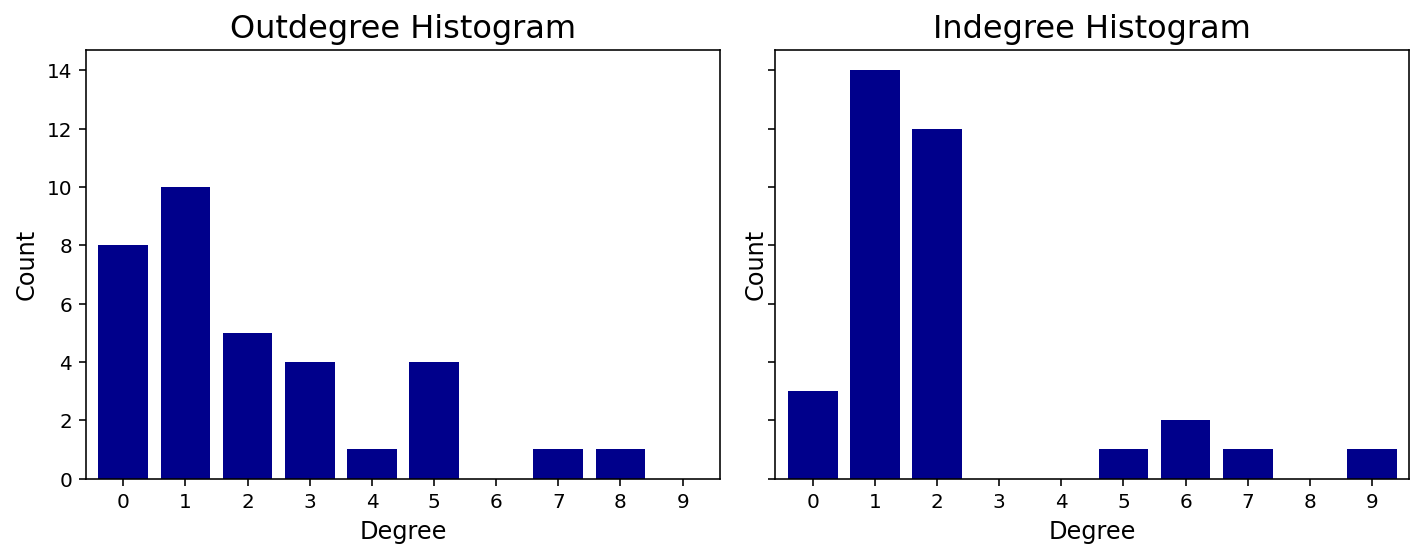

In [65]:
# create a figure with two constituent axes (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
# axs is an iterable object of axes - plot separately on the first axis (axs[0]) and the second axis (axs[1])
fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True) #<--- the two plots share the same y axis (for comparability)

### OUTdegree:
degree_sequence = sorted([d for n, d in DiR.out_degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg_out, cnt_out = zip(*degree_count.items())
axs[0].bar(deg_out, cnt_out, width=0.80, color='darkblue') #<-- plot the outdegree distribution bar plot on the first axis

# set plot parameters
axs[0].set_title("Outdegree Histogram", size=16)

# INdegree:
degree_sequence = sorted([d for n, d in DiR.in_degree()], reverse=True) 
degree_count = collections.Counter(degree_sequence) 
deg_in, cnt_in = zip(*degree_count.items())
axs[1].bar(deg_in, cnt_in, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

# set plot parameters
axs[1].set_title("Indegree Histogram", size=16)
axs[1].set_ylabel("Count", size=12)
axs[1].set_xlabel("Degree", size=12)

# define plot parameters
max_degree = max([d for n,d in DiR.out_degree()] + [d for n,d in DiR.in_degree()]) #<--- used to plot x axis: the maximum degree (out or in) found in the nodes 
for ax in axs: # some of the parameters are the same for both axes - applying them iteratively saves lines of code
    ax.set_ylabel("Count", size=12)
    ax.set_xlabel("Degree", size=12)
    ax.set_xticks(range(0, max_degree+1)) # ensure both plots share the same x axis ticks for comparability
    ax.set_xlim((-0.6, max_degree+0.6))

plt.tight_layout()
plt.show()